<a href="https://colab.research.google.com/github/Adam5567/DataScience/blob/master/CoffeePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Daily Coffee Price
Name: Adam Livingston

This notebook shows explaratory data analysis on coffee data and then performs a simple linear regression to perdict a closing price

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn import preprocessing, model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [1]:
from google.colab import files
uploaded = files.upload()

Saving coffee.csv to coffee.csv


In [34]:
data = pd.read_csv('coffee.csv')

In [4]:
#viewing the data
data.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD


In [10]:
data.tail()

,Date,Open,High,Low,Close,Volume,Currency
5692,2022-06-17,232.70,234.50,226.8,227.65,9111,USD
5693,2022-06-21,227.60,235.25,227.4,232.35,30335,USD
5694,2022-06-22,231.25,237.10,230.4,236.40,13143,USD
5695,2022-06-23,235.55,236.25,228.1,229.00,16824,USD
5696,2022-06-24,231.25,234.45,226.0,226.60,137,USD


In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,5697.000000,5697.000000,5697.000000,5697.000000,5697.000000
mean,126.463063,128.029824,124.994532,126.408922,8790.661401
std,50.024599,50.608406,49.317908,49.956232,9612.298820
min,41.500000,42.000000,41.500000,41.500000,0.000000
25%,98.500000,99.750000,97.500000,98.400000,61.000000
50%,120.000000,121.300000,118.650000,119.950000,6988.000000
75%,143.550000,144.800000,141.800000,143.250000,14477.000000
max,305.300000,306.250000,304.000000,304.900000,62045.000000


In [9]:
#checking for nulls
data.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

#Running some visualizations to better see the data

In [12]:
sns.set_theme()

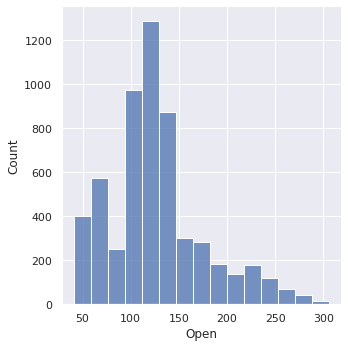

In [17]:
sns.displot(data, x='Open', bins = 15)

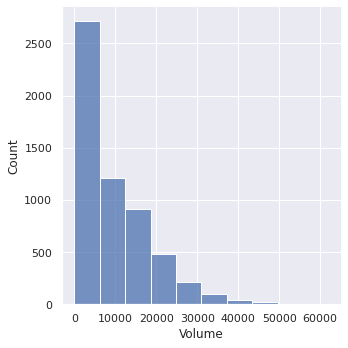

In [19]:
sns.displot(data, x='Volume', bins = 10)

In [28]:
fig = go.Figure(go.Candlestick(x = data["Date"],
    open = data["Open"], high = data["High"],
    low = data["Low"], close = data["Close"]))

fig.update_layout(xaxis_title = "Year", yaxis_title = "USD", title = "Daily Coffee Price")
fig.update_layout(template = "plotly_dark")

fig.show()

#Now we can get ready to perform linear regression. We want to see if we can predict the closing price based off of the other variables (columns). In this case, the closing price will be our y value and the rest will become our X values.

In [31]:
#The currency column is all labled as USD
data['Currency'].nunique()

1

In [35]:
#Dropping the currency column
data.drop('Currency', axis=1, inplace=True)

In [66]:
#This cell creates an object of LinearRegression (LR), creates an X and y variable of the data,
#and splits the X and y into training and testing (splits)
#we try a test size of 25% and keep a random state to see reproducible results

lm = LinearRegression()

X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [67]:
#This fits the data to our LR model and then predicts based off of the X_test data
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

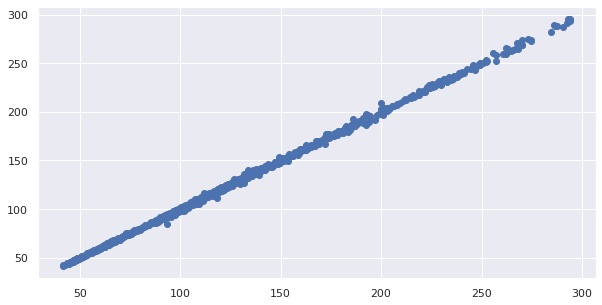

In [68]:
#Now that we predicted the y_test with y_pred, we can graph it against the true y_test data
plt.figure(figsize=(10,5))
plt.scatter(y_pred, y_test)

In [75]:
#We can further see how the model performed with the following metrics
from sklearn import metrics

print('Mean abolsute error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean square error:', metrics.mean_squared_error(y_test, y_pred))
print('Model prediction score:', lm.score(X_test, y_test))

Mean abolsute error: 0.7999841118728718
Mean square error: 1.5040159340901151
Model prediction score: 0.9993758103106171
